# Linear Regression

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y)

Example:  

*   If we want age, weight, sex and other parameters of people and we want to predict the height of person, this is linear regression problem.
*   Predicting house price using it's features(area, location, age...) is also a linear regression problem.

Firstly we discuss linear regression with one feature(target is dependentonly on one variable).

## Linear Regression with One Variable:


![](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Example-of-simple-regression.png)

On this image we see information about a companys sales and advertising over years. We can mak a scatter plot for this kind of data:

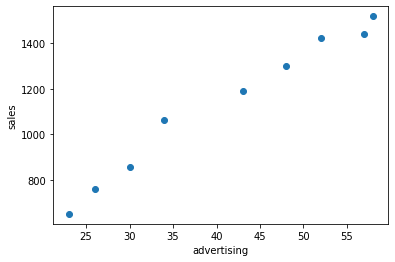

In [1]:
import matplotlib.pyplot as plt
import numpy as np


X = [23, 26, 30, 34, 43, 48, 52, 57, 58]  # advertising
y = [651, 762, 856, 1063, 1190, 1298, 1421, 1440, 1518]  # sales

plt.scatter(X, y)
plt.xlabel('advertising')
plt.ylabel('sales')
plt.show()

We need to create a model that predicts sales using advertising, so input for our model will be advertismenet column and it should predict sales column. The most common way to solve this problem is to use one variable linear regression.

We should have this function: $f(x) = w_0 + w_{1}x$ where $w_1$ indicates slope of line and $w_0$ is a free parameter. Usually we call weights to these parameters. If $w_1 = 0$, then values of $y$-are not dependent on $X$; If $w_1 > 0$, $y$ increases when $X$ is increasing, if $w_1 < 0$ our function is decreasing.

We should assign some initial value to our weights(parameters) and we should correct them several times until we reduce error_cost to a minimum. Usually, in case of linear regression, initial values are zeros. We need this values and  $L$ variable:

*   $w_0^{0} = 0$ and $w_1^{0} = 0$.  
*   Using $L$ variable we control how much is delta(change) between $w = (w_0, w_1)$ cofficients while going from one epoch to another. The name of this variable is Learning Rate, it must have positive value.

So our model has a line according to this function: $f(x) = w_0^{0} + w_1^{0}x$ , on each step it generates new parameters $w^1 = (w_0^{1}, w_1^{1})$ before converging and this steps is called epochs.

As we already said, our main goal is to reduce value of error. Error function is dependent on variables $w_0$ and $w_1$ and its name is cost/loss function. Very often people use mean squared error to define loss function:
$$J(w) = J(w_0, w_1) = \frac{1}{2n} \sum_{i=1}^{n}(y_i^* - y_i)^2 = \frac{1}{2n} \sum_{i=1}^{n}(w_0 + w_1x_i - y_i)^2$$  
where $n$ is number of rows, $y_i^\ast$ - predicted ourput by model in the $x_i$ point ( $y_i^\ast = f(x_i)$ ).

* Why people use Squared Error? - First of all it always has nonnegative values and doesn't try to reduce cost function in the way of getting bigger negative value. Also it doesn't have local extremas, it has only global minimum and is differentiable in any point. 
  
* Why people use MEAN Squared Error? - When we calculate squared error, it increases automatically if we increase row number so we need to take an average.

* Why people use 1/2 coefficient? - Differential gives us extra '2' and we just need reduction of it so we use 1/2. In fact it is not necessary, it's just more beautiful(we need differentiate to minimize the function)

Cost function of linear regression is like this:  
![](https://i.ytimg.com/vi/riplXsNf_zs/maxresdefault.jpg)  
axes on down represent $w_0, w_1$ parameters, upper axis represents value of cost function. Point $A$ is starting point - $(w_0^0, w_1^0, J(w_0^0, w_1^0))$ and point $B$ is our target(minimum of the function). To get from point $A$ to point $B$ we should use __gradient descent__ algorithm. Gradient is the same as slope/differential(in our case it will be partial differentials). Also sometimes vector of partial differential of function is called as gradient: $\nabla f(x, y) = (\frac{\partial f(x, y)}{\partial x}, \frac{\partial f(x, y)}{\partial y}) $.  
As we use gradient descent to reduce cost function, it is called optimizer(there are other optimizers too). It reduces the value of cost function step-by-step and the size of this step is denoted by learning rate. If our step is too big, we may miss the minimum point and if it is too small than we may need lots of time to reach a minimum and learning rate controls exactly the step size.


Using gradient descent we change coefficients $w^j = (w_0^{j}, w_1^{j})$  ($j$ is number of epoch ) according to this rule:


* Let's look at our cost function:

$$ J(w^j) = J(w_0^j, w_1^j) = \frac{1}{2n} \sum_{i=1}^{n}(w_0^j + w_1^jx_i - y_i)^2 $$

* We should evaluate partial derivatives of $J(w^j)$ so the slope of the function along each variable:

$$
\frac{\partial J(w^j) }{\partial w_0^{j}} = \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)
$$

$$
\frac{\partial J(w^j) }{\partial w_1^{j}} = \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)x_i
$$

*   Then we use that values to calculate new values for our variables $(w_0, w_1)$ 

$$
w_0^{j+1} = w_0^{j} - L \frac{\partial J(w^j) }{\partial w_0^{j}} = 
w_0^{j} - L \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)
$$

$$
w_1^{j+1} = w_1^{j} - L \frac{\partial J(w^j) }{\partial w_1^{j}} =
w_1^{j} - L \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)x_i
$$

This means that our variables travel along the direction of decrease. As we already saw, in case of linear regression we always have global minimum so if we choose good learning rate, we will always reach the global minimum. Usually we try L=0.01 or L=0.001 but we should try some different values too.

It's also important to make sure that $X$ is in range of $[0: 1]$ because if it is in some big range than gradient descent will be much slower.

In [2]:
def gradient_descent(X, y, w0_init=0, w1_init=0, L=1e-2, tol=1e-3, max_iters=10000):
    """
    Args:
          X : One dimensional numpy array (n, )
          y : One dimensional numpy array (n, )

    w0_init : initial value of w0 (default 0)
    w1_init : initial value of w1 (default 0)
    L : learning rate (default 1e-2)
    tol : tolerance (default 1e-3)
    max_iters: maximum number of epochs
    
    Returns:
          tuple with two floats : w1, w0
    """
    w0, w1 = w0_init, w1_init  # initialize of weights

    n = len(X) # num rows

    # linear regression
    for i in range(max_iters): 
        y_pred = w1*X + w0  # predicted output
        err = y_pred - y   # error
        D_w1 = (1/n) * sum(X*err) # derivative along w1
        D_w0 = (1/n) * sum(err)  # derivative along w0
        if abs(L*D_w1) <= tol and abs(L*D_w0) <= tol:  # If weights are almost the same, let's stop here
            break
        w1 = w1 - L * D_w1  # update w1
        w0 = w0 - L * D_w0  # update w1 
    return (w1, w0)

In [3]:
X, y = np.array(X), np.array(y)  # convert to numpy array
X = (X - X.min())/(X.max() - X.min())  # scaling X in range [0: 1] 
w1, w0 = gradient_descent(X, y) 
w1, w0

(818.8000844493249, 706.9841348102336)

Let's make some visualization:

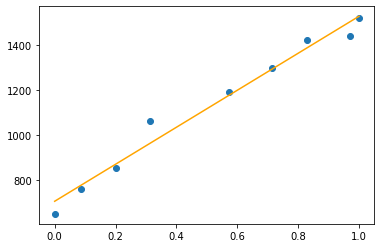

In [4]:
plt.scatter(X, y)
plt.plot([0, 1], [w0, w1 + w0], c='orange') 
plt.show()

## Multivariable Linear Regression

We have more than one($m$) independent variable/feature, so we will have $m+1$ weights. Now $X$ looks like this:
$$
X_{n,m}= 
\begin{pmatrix}
  x_{1,1} & x_{1,2} & \cdots & x_{1,m} \\
  x_{2,1} & x_{2,2} & \cdots & x_{2,m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,1} & x_{n,2} & \cdots & x_{n,m} 
\end{pmatrix}
$$

and our line equation is like this:
$$f(x) = w_0 + w_1x_1 + \cdots + w_mx_m$$ 

Initial values are still zeros

*   $w_0^{0} = 0$, $w_1^{0} = 0$ ... $w_m^{0} = 0$. 

 $f(x) = w_0^{0} + w_1^{0}x_1 + \cdots + w_m^{0}x_m$ this is our line, we should update these parameters: $(w_0^{1}, w_1^{1}, \cdots, w_m^1)$ while they don't converge


Process of updating weights is the same as one variable linear regression, we should update variables: $w^j = (w_0^{j}, w_1^{j}, \cdots, w_m^{j})$ ($j$ is epoch number):

* Let's look at cost function

$$ J(w^j) = \frac{1}{2n} \sum_{i=1}^{n}(y_i^\ast - y_i)^2 = \frac{1}{2n} \sum_{i=1}^{n}(w_0^j + w_1^jx_{i, 1} + \cdots + w_m^jx_{i, m} - y_i)^2 $$

* We should calculate each partial derivative of function $J(w^j)$ along each variable $w_k^{j}$ (so we should evaluate slope for each variable):
$$
\frac{\partial J(w^j) }{\partial w_0^{j}} = \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)
$$
for any other $w_k^{j}$:
$$
\frac{\partial J(w^j) }{\partial w_k^{j}} = \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)x_{i,k}
$$

* Then we calculate new values for $w$ : 
$$
w_0^{j+1} = w_0^{j} - L \frac{\partial J(w^j) }{\partial w_0^{j}} = 
w_0^{j} - L \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)
$$
$$
w_k^{j+1} = w_k^{j} - L \frac{\partial J(w^j) }{\partial w_k^{j}} =
w_k^{j} - L \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)x_{i, k}
$$

All features should be nearly in the same range, this makes gradient descent much faster. We can use feature scaling or standartization for that.

## Vectorization

Gradient descent is pretty 'expensive' algorithm(it needs much time and computational resources as we calculate partial derivatives in each step). To fix this we can use vectorization method.
We should write features as matrix and add column '1' in matrix $X$. 

Our matrix looks like this:  
$$ 
X_{n,m+1}= 
\begin{pmatrix}
  x_{1,0} & x_{1,1} & \cdots & x_{1,m} \\
  x_{2,0} & x_{2,1} & \cdots & x_{2,m} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{n,0} & x_{n,1} & \cdots & x_{n,m} 
\end{pmatrix}
$$
  
Each $x_{i, 0}=1$, so we added one more feature that is always '1'. now we can write partial derivative of cost function like this:
$$
\frac{\partial J(w^j) }{\partial w_k^{j}} = \frac{1}{n} \sum_{i=1}^{n}(y_i^{\ast} - y_i)x_{i,k}
$$  
and also predicted value: 
$$y_i^\ast = x_i^Tw^j$$
So thev ector of partial derivative of cost function will be like this:
  
$$
\frac{\partial J(w^j) }{\partial w^{j}} = 
\frac{1}{n}
\begin{pmatrix}
  \sum_{i=1}^{n}(x_i^Tw^j - y_i)x_{i,0}\\
  \sum_{i=1}^{n}(x_i^Tw^j - y_i)x_{i,1}\\
  \vdots\\
  \sum_{i=1}^{n}(x_i^Tw^j - y_i)x_{i,m}\\
\end{pmatrix}
$$  

and this is the same as: $\frac{1}{n}X^T(Xw^j-y)$. It is pretty easy to notice if we look compunents one by one. 
$$ 
X_{m+1,n}^T= 
\begin{pmatrix}
  x_{1,0} & x_{2,0} & \cdots & x_{n,0} \\
  x_{1,1} & x_{2,1} & \cdots & x_{n,1} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  x_{1,m} & x_{2,m} & \cdots & x_{n,m} 
\end{pmatrix}
$$

and 

$$ 
Xw^j-y= 
\begin{pmatrix}
  x_0^Tw^j - y_0 \\
  x_1^Tw^j - y_1 \\
  \vdots \\
  x_n^Tw^j - y_n 
\end{pmatrix}
$$

If we take product of them on  ($\frac{1}{n}$) we'll get exactly $\frac{\partial J(w^j) }{\partial w^{j}}$.
So we can update weights with just simple substraction of mvectors:
$$ w^{j+1} = w^j - L \frac{1}{n}X^T(Xw^j-y) $$ 


In [5]:
def vectorized_gradient_descent(X, y, w_init, L=1e-2, tol=1e-3, max_iters=10000):
    """
    Args:
          X : two-dimensional numpy array (n, m)
          y : one-dimensional numpy array (n, )
          w_init : initial values of weights. numpy array (m, )

          L : learning rate (default 1e-2)
          tol : tolerance (default 1e-3)
          max_iters: maximum number of epochs
    
    Returns:
          one-dimensional numpy array : weights
    """
    w = w_init.copy()  # initialize of weights vector

    n = X.shape[0] # number of rows
    X_full = np.insert(X, 0, np.array([1]*n), axis=1)

    # linear regression
    for i in range(max_iters): 
        step = L * (1/n) * X_full.T.dot(X_full.dot(w) - y)
        if np.all(abs(step) <= tol):  # if delta(difference) is too smal, let's stop
            break
        w = w - step  # update weights
    return w

Now we need some data to test our multivariable linear regression. Let's use this dataset: https://www.kaggle.com/aungpyaeap/fish-market

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Rango/data/Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


We have 7 features. `Species` is categorical column so we need to make it numeric to be able to use it in regression model. Usually we would use one hot encoding but for now let's just delete this column. `Weight` is our target value, let's look at correlation matrix:

In [9]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


We can delete `Length2` as its correlation coefficient to `Length1` is 0.9995

In [10]:
y = np.array(df['Weight'])
X = np.array(df.drop(columns=['Species', 'Weight', 'Length2']))

X.shape, y.shape

((159, 4), (159,))

In [11]:
from sklearn.preprocessing import StandardScaler     

# standartization of X
scaler = StandardScaler()
X = scaler.fit_transform(X)

w_init = np.array([0]*5)  # initial weights
w = vectorized_gradient_descent(X, y, w_init)
w

array([398.32641509, 175.3714269 ,  49.31050861,  48.60814565,
        82.49996959])

Let's look at $R^2$ (coefficient of determination) coefficient that will help us to estimate how good is our model.
$$ 
R^2 = 
1 - \frac{\sum_{i=1}^{n} (y_i - y_i^\ast)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} 
$$

$\bar{y_i} = \frac{1}{n} \sum_{i=1}^{n} y_i$, $1 -$ mean square error / dispersion.   
$R^2$ tells us what portion of target column variation was evaluated correctly by our model with its independent variables. We have this metric in sklearn library (metrics module) and model is as good as this score is near to 1.

In [12]:
from sklearn.metrics import r2_score

X_full = np.insert(X, 0, np.array([1]*X.shape[0]), axis=1)
y_pred = X_full.dot(w)

r2_score(y, y_pred) 

0.8817244431417081

## Stochastic Gradient Descent (SGD)  
When we have too many rows, even vectorization isn't a good option because gradient descent(sometimes called as batch gradient descent) uses each row for each iteration. So here we have similar but different algorithms - stochastic gradient descent. It uses one row for each epoch, so it calculates result for each row than calculates error and updates weights. If we want to get a good result, we should go through each row for several times.
Usually people don't use batch gradient descent and in sklearn we even don't have its implementation but we have SGD there.

In [13]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(verbose=1)  # if verbose is one then there will be printed some informatino after each epoch
reg.fit(X, y)

print(reg.coef_) 
print(reg.intercept_)

-- Epoch 1
Norm: 165.19, NNZs: 4, Bias: 186.778345, T: 159, Avg. loss: 59562.098086
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 179.73, NNZs: 4, Bias: 257.446651, T: 318, Avg. loss: 23539.634177
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 185.24, NNZs: 4, Bias: 300.071067, T: 477, Avg. loss: 14991.693555
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 187.30, NNZs: 4, Bias: 328.052666, T: 636, Avg. loss: 11370.141143
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 187.89, NNZs: 4, Bias: 346.754003, T: 795, Avg. loss: 9659.358134
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 185.32, NNZs: 4, Bias: 359.663913, T: 954, Avg. loss: 8793.389748
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 186.12, NNZs: 4, Bias: 369.344394, T: 1113, Avg. loss: 8335.684036
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 186.85, NNZs: 4, Bias: 376.161916, T: 1272, Avg. loss: 8074.669130
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 185.09, NNZs: 4, Bias: 381.201759

In [14]:
y_pred = reg.predict(X)

r2_score(y, y_pred)

0.8806157976490949

It's a little worse result than batch gradient descent but it's much faster.

## Normal Equation

There is some analytical way to find a minimum - normal equation. We get normal equation by equaling zero to all partial derivatives of cost function because as we know from calculus this is the way to find minimum

$$ \frac{\partial J(w) }{\partial w} = \frac{1}{n}X^T(Xw-y) = 0 $$

multiply by $n$:
$$ X^T(Xw-y) = 0 $$

open brackets: 
$$ X^TXw - X^Ty = 0 $$

$$ X^TXw = X^Ty $$

multiply by $(X^TX)^{-1}$ from the left
$$ w = (X^TX)^{-1}X^Ty $$

We have normal equation. So we solve linear regression with only one equation but sometimes $X^TX$ is not invertable so we need to use pseudo inverse (`numpy.linalg.pinv()`). If we have all independent variables than this case should happen only if number of columns is more than number of rows and this is pretty rare case.  
        
advatnages of normal equation:  
* we don't need to choose learning rate
* we don't need updating weights  
* we don't need feature scaling

disadvatnages of normal equation:
* is $m$ is too big, than it's slow because calculating $(X^TX)^{-1}$-ის is difficult operation

So if $m$ is big (probably more than 1000), we should use gradient descent 

If we want to solve linear regression using normal equation, we can use `LinearRegression()` class from sklearn.linear_model library. It has `fit()` method(we should pass $X$ and $y$). `intercept_` gives us free variable and `coef_` - other weights.

In [16]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X, y)

print(reg.coef_) 
print(reg.intercept_)

[ 565.38848272 -348.7203526   121.57902204   36.09084694]
398.32641509433967


In [17]:
y_pred = reg.predict(X)

r2_score(y, y_pred)

0.8852683890437998

This is slightly better than gradient descent because we stopped gradient descent somewhere near minimum and normal equation gives us exact answer.